In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

Считаем данные по сердечным заболеваниям.

In [2]:
df = pd.read_csv('heart.csv')

### Задание 1. Построение модели, предсказывающей, есть ли болезнь у пациента.

Выделим предсказываемую переменную. Разделим данные на часть по которой будут строиться модели и на часть, на которой будем тестировать точность моделей.

In [3]:
X = df.drop(columns = ['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [4]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,41,1,2,112,250,0,1,179,0,0.0,2,0,2
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2


Обучим модель Logistic Regression и сделаем её предсказания.

In [5]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

C:\Users\licei\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Обучим модель SVC и сделаем её предсказания.

In [6]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)


Обучим модель Decision Tree и сделаем её предсказания.

In [7]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

Оценим точность моделей.

In [8]:
df_score = pd.DataFrame()
df_score['model'] = ['Logistic Regression', 'SVC', 'Decision Tree']
df_score['accuracy score'] = [accuracy_score(y_test, y_pred_logistic), accuracy_score(y_test, y_pred_svc), accuracy_score(y_test, y_pred_tree)]
df_score['roc auc score'] = [roc_auc_score(y_test, y_pred_logistic), roc_auc_score(y_test, y_pred_svc), roc_auc_score(y_test, y_pred_tree)]
df_score['f1 score'] = [f1_score(y_test, y_pred_logistic), f1_score(y_test, y_pred_svc), f1_score(y_test, y_pred_tree)]

In [9]:
df_score

,model,accuracy score,roc auc score,f1 score
0,Logistic Regression,0.826087,0.836257,0.840000
1,SVC,0.630435,0.607212,0.701754
2,Decision Tree,0.739130,0.746589,0.760000


__Вывод:__ По всем оценкам выигрывает модель Logistic Regression.

### Задание 2. Как зависит холестерин от возраста у здоровых людей?

Создадим таблицу только со здоровыми людьми

In [10]:
healthy = df[df['target'] == 0]

Построим график и предсказание модели

In [11]:
model = LinearRegression()
model.fit(np.array(healthy['age']).reshape(-1, 1), healthy['chol'])
result = model.predict(np.array([25, 80]).reshape(-1,1))

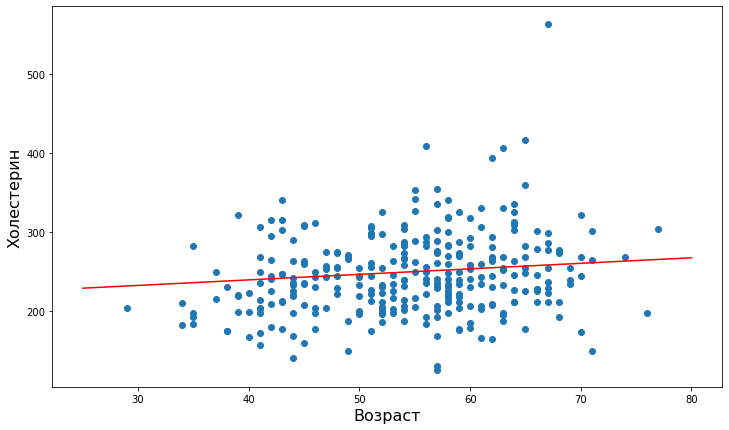

In [12]:
plt.figure(figsize=(12,7))
plt.xlabel('Возраст', fontsize=16)
plt.ylabel('Холестерин', fontsize=16)
plt.scatter(df['age'], df['chol'])
plt.plot([25, 80], result, color='red')

Судя по предсказанию модели, с увеличением возраста здорового человека, холестерин немного увеличивается 

In [18]:
model.coef_

array([0.69945042])

Посчитаем корреляцию и посмотрим на зависимость

In [13]:
corr = healthy[['age', 'chol']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,chol
age,1,0.11
chol,0.11,1


Корреляционная матрица также говорит о том, что зависимость действительно есть, но, кажется, не существенная.

### Задание 3. Как связаны болезни сердца и содержание сахара в крови?

In [19]:
data_crosstab = pd.crosstab(df['fbs'], df['target']) 
data_crosstab

target,0,1
fbs,,
0,116,142
1,22,23


Отсюда можно сделать вывод, что повышенный сахар в крови не влияет на болезни сердца. При этом среди людей с заболеваниями сердца больше тех, у которых сахар не повышенный. 

In [15]:
corr = df[['fbs', 'target']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,fbs,target
fbs,1,-0.028
target,-0.028,1


__Вывод:__ Судя по корреляции, болезни сердца не зависят (или зависят очень слабо) от уровня сахара в крови.